<a href="https://colab.research.google.com/github/RM-RAMASAMY/decision_trees/blob/main/gbm_classifier_techniques/xgboost_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost Classifier Overview

**XGBoost** (eXtreme Gradient Boosting) is a high-performance implementation of the gradient boosting framework that is optimized for speed, efficiency, and scalability. It is widely used in supervised learning tasks, including classification and regression, due to its robust feature set and ability to handle large datasets effectively.

---

## **Key Features of XGBoost Classifier**

1. **Objective Functions for Classification**:
   - `binary:logistic`: Logistic regression for binary classification (outputs probabilities).
   - `binary:hinge`: Hinge loss for binary classification.
   - `multi:softmax`: Multiclass classification using the softmax function (outputs class labels).
   - `multi:softprob`: Multiclass classification that outputs class probabilities.

2. **Regularization**:
   - Supports both L1 (LASSO) and L2 (Ridge) regularization to prevent overfitting.

3. **Parallel Processing**:
   - Highly optimized for parallel computations, allowing faster training compared to traditional gradient boosting frameworks.

4. **Handling Missing Values**:
   - Automatically learns the best way to handle missing data during tree construction.

5. **Tree Pruning**:
   - Uses a "max-depth" parameter or a minimum loss reduction (`gamma`) to prune unnecessary splits, making it efficient and less prone to overfitting.

6. **Built-in Cross-Validation**:
   - Comes with functionality for k-fold cross-validation during training.

7. **Feature Importance**:
   - Offers insights into feature importance, which is helpful for interpretability.

8. **Custom Loss Functions**:
   - Supports user-defined loss functions, providing flexibility for specialized tasks.

9. **Support for Imbalanced Classes**:
   - Provides a `scale_pos_weight` parameter for handling imbalanced datasets in binary classification tasks.

---

## **How XGBoost Classifier Works**

XGBoost builds decision trees sequentially. Each subsequent tree attempts to correct the errors made by previous trees by focusing on instances where the model predictions differ most from the actual target values. For classification tasks:
- **Binary classification** optimizes a logistic loss function.
- **Multiclass classification** extends the logic using the softmax function.

The algorithm uses a combination of boosting and weighted voting to combine predictions from multiple weak learners into a stronger, ensemble model.

---

## **Advantages of XGBoost Classifier**

1. **Speed**: Highly optimized for faster training and prediction.  
2. **Accuracy**: Tends to achieve high predictive performance with minimal tuning.  
3. **Flexibility**: Works well for small to large-scale datasets, structured data, and imbalanced classes.  
4. **Scalability**: Can handle datasets with millions of rows and features.  
5. **Feature Handling**: Automatically handles missing values and offers tools for feature importance.

---

## **Common Use Cases**

- Fraud detection (e.g., identifying fraudulent transactions).  
- Customer churn prediction.  
- Medical diagnostics (e.g., disease prediction).  
- Natural language processing (e.g., text classification).  
- Marketing campaigns (e.g., lead scoring).


In [1]:
# installations
%pip install matplotlib >/dev/null
%pip install numpy >/dev/null
%pip install pandas >/dev/null
%pip install scikit-learn >/dev/null
%pip install seaborn >/dev/null
%pip install xgboost >/dev/null

#imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import xgboost as xgb

from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
white_df = pd.read_csv('winequality-white.csv', sep=';')
print(white_df.shape)
white_df.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
red_df = pd.read_csv('winequality-red.csv', sep=';')
print(red_df.shape)
red_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_df['white_wine'] = 1
red_df['white_wine'] = 0

In [5]:
red_white_df = pd.concat([red_df,white_df])
red_white_df.shape

(6497, 13)

In [6]:
wine_df = red_white_df.sample(frac=1).reset_index(drop = True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white_wine
0,7.6,0.370,0.51,11.7,0.094,58.0,181.0,0.99776,2.91,0.51,9.0,5,1
1,6.9,0.400,0.17,12.9,0.033,59.0,186.0,0.99754,3.08,0.49,9.4,5,1
2,8.6,0.530,0.22,2.0,0.100,7.0,27.0,0.99670,3.20,0.56,10.2,6,0
3,9.8,0.510,0.19,3.2,0.081,8.0,30.0,0.99840,3.23,0.58,10.5,6,0
4,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3,5,0


In [7]:
# no missing values
wine_df.isnull().values.any()

False

In [8]:
#check that value counts match the initial white_df and red_df lengths
wine_df['white_wine'].value_counts()

,count
white_wine,
1,4898
0,1599


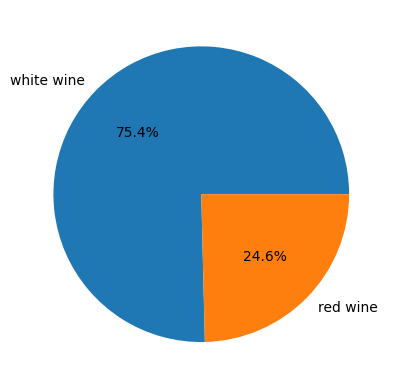

In [9]:
wine_values = wine_df['white_wine'].value_counts().values
wine_labels = ["white wine", "red wine"]
plt.pie(wine_values,labels=wine_labels, autopct='%1.1f%%',)
plt.show()

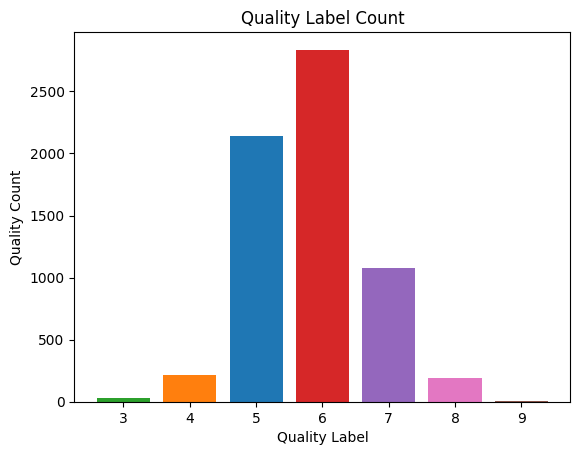

In [10]:
fig, ax = plt.subplots()
quality_values = wine_df['quality'].value_counts().values
quality_labels = wine_df['quality'].value_counts().index
bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:pink','tab:green', 'tab:brown']

ax.bar(quality_labels, quality_values, label=quality_labels, color= bar_colors)
ax.set_ylabel('Quality Count')
ax.set_xlabel('Quality Label')
ax.set_title('Quality Label Count')

plt.show()

In [11]:
wine_df['good_quality'] = [0 if x < 6 else 1 for x in wine_df['quality']]
wine_df['good_quality'].value_counts(normalize=True)

,proportion
good_quality,
1,0.633061
0,0.366939


In [12]:
wine_df = wine_df.drop(['quality'], axis =1)

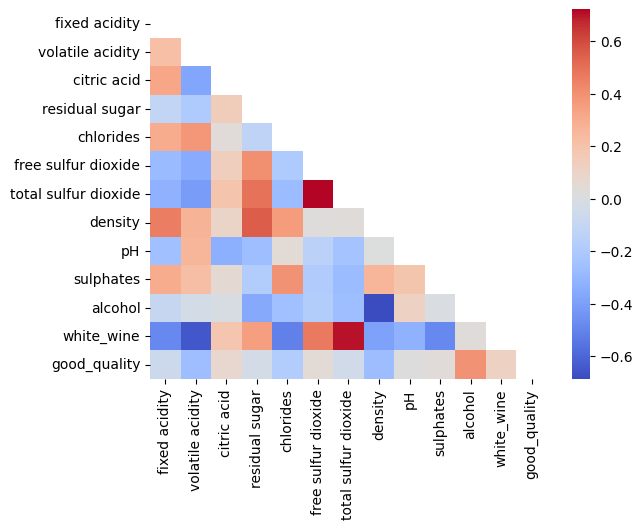

In [13]:
mask = np.triu(np.ones_like(wine_df.corr()))

# plotting a triangle correlation heatmap
dataplot = sns.heatmap(wine_df.corr(), cmap="coolwarm",mask=mask)

In [14]:
# Split data into X and y
X = wine_df.drop(columns=['good_quality'], axis=1)
y = wine_df['good_quality']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

In [16]:
y_train.value_counts(normalize=True)

,proportion
good_quality,
1,0.633165
0,0.366835


In [17]:
y_test.value_counts(normalize=True)

,proportion
good_quality,
1,0.632821
0,0.367179


In [18]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test,label=y_test)

In [19]:
learning_objective = {'objective':'binary:logistic' }
model = xgb.train(params = learning_objective, dtrain= dmatrix_train)

In [20]:
test_predictions = model.predict(dmatrix_test)
round_test_predictions = [round(p) for p in test_predictions]
accuracy_score(y_test,round_test_predictions)

0.7748717948717949

### Train and Evaluate the Model with Hyperparameter Tuning

**GridSearchCV**, which stands for "Grid Search Cross-Validation," is a technique used for hyperparameter tuning. First, we set up a dictionary of parameters we want to test, and then GridSearchCV systematically iterates through our dictionary to find the optimal combination which yields the best model accuracy.

We will be tuning the following hyperparameters in our XGBoost model:

---

#### **1. Learning Rate**
- The rate at which the boosting algorithm learns from each iteration.
- A lower value of `eta` means slower learning, as it scales down the contribution of each tree in the ensemble.

---

#### **2. Gamma**
- Controls the minimum amount of loss reduction required to make a further split on a leaf node of the tree.
  - **Lower value**: XGBoost stops earlier but may not find the best solution.
  - **Higher value**: XGBoost continues training longer, potentially finding better solutions, but with a greater risk of overfitting.

---

#### **3. Max Depth**
- Represents how deeply each tree in the boosting process can grow during training.
- A tree's depth refers to the number of levels or splits it has from the root node to the leaf nodes.
- **Increasing this value**:
  - Makes the model more complex and more likely to overfit.
  - Default `max_depth` in XGBoost is 6.

---

#### **4. Min Child Weight**
- Controls the minimum sum of weights required in a child (leaf) node.
- If the sum of weights in a node is less than `min_child_weight`, the node will not be split further.
  - **Non-zero values**: Encourage simpler and more robust models.
  - **Higher values**: Curb overfitting.
- Default in XGBoost is 1.

---

#### **5. Subsample**
- Represents the fraction of the training dataset randomly sampled to train each tree in the ensemble.
  - **1**: Uses the entire training dataset.
  - **Values < 1**: Use a fraction of the dataset, introducing randomness.
- Helps improve robustness and reduce overfitting.

---

#### **6. N_estimators**
- Specifies the number of trees to be built in the ensemble.
  - **Higher values**:
    - Increase model complexity.
    - Allow the model to capture more intricate patterns but may lead to overfitting.
  - To balance complexity, reduce the learning rate as `n_estimators` increases.

---

#### **7. Colsample_bytree**
- Demonstrates the percentage of features (columns) to be randomly sampled for each tree during training.
  - **1**: Uses all features.
  - **Values < 1**: Use a fraction of the features, reducing overfitting.
- Encourages diversity among the trees in the ensemble.
- Default value in XGBoost is 1.


In [25]:
params_grid = {
       'learning_rate': [0.05],
       'gamma':[0],
       'max_depth': [6, 7],
       'min_child_weight': [2, 3],
       'subsample': [0.7],
       'n_estimators': [400, 600],  # Reduced options
       'colsample_bytree':[0.7, 0.8],
   }

In [26]:
classifier = xgb.XGBClassifier()

In [27]:
grid_classifier = GridSearchCV(classifier, params_grid, scoring='accuracy', cv=5)
grid_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0],
                         'learning_rate': [0.05], 'max_depth': [6, 7],
                         'min_child_weight': [2, 3], 'n_estimators': [400, 600],
                         'subsample': [0.7]},
             scoring='accuracy')

In [28]:
grid_classifier = GridSearchCV(classifier, params_grid, scoring='accuracy', cv=5)
grid_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0],
                         'learning_rate': [0.05], 'max_depth': [6, 7],
                         'min_child_weight': [2, 3], 'n_estimators': [400, 600],
                         'subsample': [0.7]},
             scoring='accuracy')

In [31]:
grid_test_preds = grid_classifier.predict(X_test)
grid_test_accuracy = accuracy_score(y_test, grid_test_preds)
grid_test_accuracy

0.8071794871794872

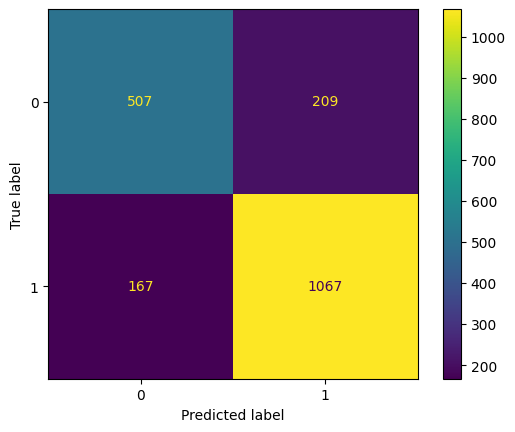

In [32]:
cm = confusion_matrix(y_test, grid_test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_classifier.classes_)
disp.plot()
plt.show()

### Summary

In this tutorial, we introduced **XGBoost** and how it uses **gradient boosting** to combine the strengths of multiple decision trees for strong predictive performance and interpretability.

We:
- Explored the **wine dataset** and identified the features to train an XGBoost binary classification model.
- Learned about **cross-validation** and **grid search** and implemented them using the `scikit-learn` library.
- Identified the **best hyperparameters** through grid search.
- Trained an XGBoost model using the **best hyperparameters** and compared its performance to the default hyperparameter version.
